# Voronoi Diagrams

## Introduction

This project introduces us to Python through the world of generative art. We will first walk through the logic of the code for making the art. Then we'll lay out a complete code block for implementing this on the cluster as a submittable script. As you work through the logic, make sure to print variables to get a sense of what's happening line by line. Please note that this code and notebook were modified from a blog post and a related github repo. Those resources are available here:

https://www.generativehut.com/post/robots-and-generative-art-and-python-oh-my

https://github.com/zoso95/plotter_guides/tree/master/genhut

**NOTE:** As you are reading through this notebook, you'll notice that there is text with a white background and `code blocks` with a `gray` background. The `code blocks` will also be noteworthy because they have `In []:` in the lefthand margin. The brackets may be filled with a number or not. As you progress, be sure to put your cursor in the `code blocks` and hit the `Run` button above. This will actually run the code and provide a result.

## Loading modules

As a first step, we need to load some modules. We'll import NumPy, elements of SciPy, and elements of matplotlib. This art project uses a mathematical concept called a Voronoi diagram. You don't need to know the math behind it more than to understand that it converts a set of random points into a series of polygons in which the sides of the polygons are always equidistant from the two nearest points. If you want to read more about it, feel free to check out this totally obscure reference:

https://en.wikipedia.org/wiki/Voronoi_diagram

This is also a great description:

https://towardsdatascience.com/the-fascinating-world-of-voronoi-diagrams-da8fc700fa1b

To import the necessary functions from various modules, run the following:

In [1]:
import numpy as np
from scipy.spatial import Voronoi

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

## Initializing the plot

Now we want to set up the bounds of the diagram. There are really just arbitrary numbers, but they will influence the aspect ratio of the image. Also, `num_points` will define how many polygons there are. Finally, the `x` and `y` variables are `num_points` random values between 0 and `x_max` or `y_max`, converted to single-column arrays and then pasted together with `hstack` (similar to `cbind` in R).

In [2]:
x_max = 16
y_max = 16
num_points = 200

x = np.random.uniform(0,x_max, size=num_points).reshape((num_points, 1))
y = np.random.uniform(0,y_max, size=num_points).reshape((num_points, 1))
pts = np.hstack([x, y])

We can see the top of the `pts` array with the command below. It's a two-column array with `num_points` rows.

In [3]:
print(pts[0:10,:])

[[ 0.11543963  5.58462496]
 [ 4.16887693  3.21290143]
 [ 2.83445799 10.83373768]
 [11.13793673  1.37170617]
 [ 7.31887536  3.20112731]
 [10.40315862  9.68613298]
 [ 8.57866175 11.46032488]
 [13.93614714  2.30750191]
 [ 1.19362048 13.29698033]
 [14.8897539   4.2370048 ]]


We can also plot the values of `pts` to see that `x` and `y` are uncorrelated values between 0 and `x_max` or `y_max`.

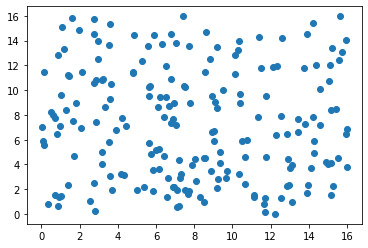

In [4]:
plt.scatter(pts[:,0],pts[:,1]) 

Now we want to convert those points into polygons. Fortunately for us, there is a `Voronoi` function in the SciPy module that takes care of it!

## Voronoi Calculation

In [5]:
vor = Voronoi(pts)
verts = vor.vertices
shapes_ind = vor.regions

`vor` is an object (Python is an "object-oriented programming" language - you can read more about that [here](https://realpython.com/python3-object-oriented-programming/) if you want) that contains certain variables that tell us about the polygons. For example, `vor.vertices` is a variable with information on the coordinates of the corners of the polygons. Similarly, `vor.regions` tells us which vertex coordinates go with which polygon. Here, we're assigning `vor.vertices` to a new variable called `verts` and `vor.regions` to a new variable called `shapes_ind`. This may be more convenient, but isn't necessary. We could always just use the original variables if we prefer. Let's explore the structure of these objects a little more.

Using the `.shape` method, we can see the shape of an array. Here, `verts` is a 2-column array with many rows.

In [6]:
verts.shape

(384, 2)

Here's the first 5 rows of `verts`.

In [7]:
verts[0:5, :]

array([[124.28125094,   5.32763448],
       [ 15.20277135,   6.6613891 ],
       [ 19.35270688,   1.27427711],
       [ 14.60255396,   1.98836611],
       [ 14.60069631,   1.99279083]])

If we plot the `x` and `y` values of `verts`, we can see that most are in the 0-16 range with a few that extend way outside those bounds. The dashed lines mark off the bounds of the original points.

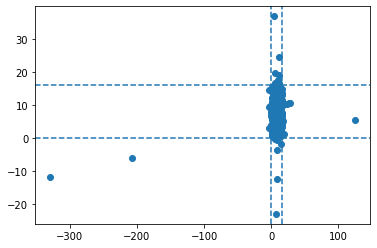

In [8]:
plt.scatter(verts[:,0],verts[:,1])
plt.axvline(x=0,linestyle='dashed')
plt.axvline(x=16,linestyle='dashed')
plt.axhline(y=0,linestyle='dashed')
plt.axhline(y=16,linestyle='dashed')

`shapes_ind` is a list. Each element of the list tells us which of the rows in `verts` make up the corners of a specific polygon. We can see that the list is 201 elements long and the first 5 polygons include an empty element, a 4-corner polygon, and 3 5-corner polygons.

In [9]:
print(len(shapes_ind))
shapes_ind[0:5]

201


[[21, 19, 18, 20],
 [19, 7, 11, 13, 18],
 [20, -1, 12, 13, 18],
 [24, 7, 19, 21, 23],
 []]

If we wanted to know the corners of the 10th polygon, we could pull it out with something like this:

In [10]:
verts[shapes_ind[10]]

array([[14.33780988,  0.51533385],
       [14.60255396,  1.98836611],
       [19.35270688,  1.27427711],
       [ 7.13695032,  1.42258298],
       [14.98933692, -1.79999363]])

If you're really unsure what an object's structure looks like, you can always use the function `dir()`. This will tell you all the variables or slots associated with an object. It can be a little overwhelming, but now we know all of the elements of `vor` and could explore each one if we wanted to.

In [11]:
dir(vor)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_points',
 '_points',
 '_qhull',
 '_ridge_dict',
 '_update',
 'add_points',
 'close',
 'furthest_site',
 'max_bound',
 'min_bound',
 'ndim',
 'npoints',
 'point_region',
 'points',
 'regions',
 'ridge_dict',
 'ridge_points',
 'ridge_vertices',
 'vertices']

Next, we want to filter the polygons. Some of the returned items in the `verts` list will be empty (so their length will be 0). Some of the `verts` will be marked as `-1` in the `shapes_ind`, indicating that they should be excluded. And finally, to make the polygon plottable in `matplotlib`, we have to "close" the polygon by having the first coordinate repeated at the end. We can do all this filtering in one line and then create a new variable called `shapes` that contains these filtered coordinates.

In [12]:
shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
shapes = [verts[s] for s in shapes_ind]

## Plotting Voronoi polygons

Now we're ready to plot some polygons! We're using the `subplots` function from `matplotlib` here. We first define the figure size, then establish the axes limits, and finally draw the outlines of the polygons with `LineCollection()` and `add_collection`.

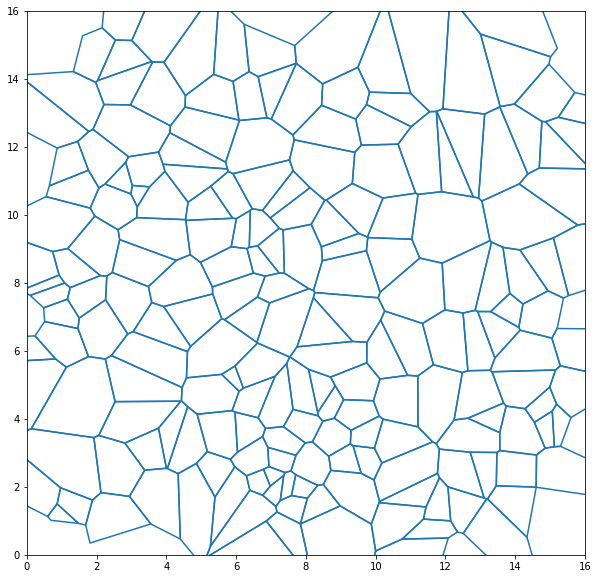

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,x_max)
ax.set_ylim(0,y_max)
lc = LineCollection(shapes)
ax.add_collection(lc)

## Drawing nested polygons

That looks cool, but to give it even more visual interest, we are going to randomly select a subset of the polygons and fill them in with even more nested polygons! Let's pull one out and have a look at it to see how this works. We'll grap polygon #15 and plot it.

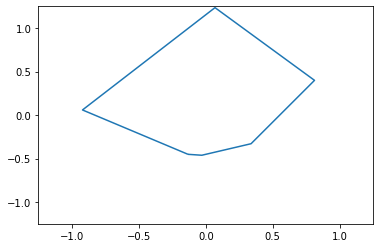

In [14]:
polygon_ind = 15
polygon = shapes[polygon_ind]

# We're just calculating the center point so that we can plot polygon #15 in the center of the plot,
# and to make it easier to calculate the nested polygons.
center = np.mean(polygon, axis=0)

#Finally, we just plot the centered polygon
fig, ax = plt.subplots()
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection([polygon - center])
ax.add_collection(lc)

So, let's make some nested polygons now. To do that, we decide how many nested polygons we want (5 in this case), and what the smallest polygon size should be proportional to the original (0.1 in this case). We then calculate the smaller polygons with equal spacing between each.

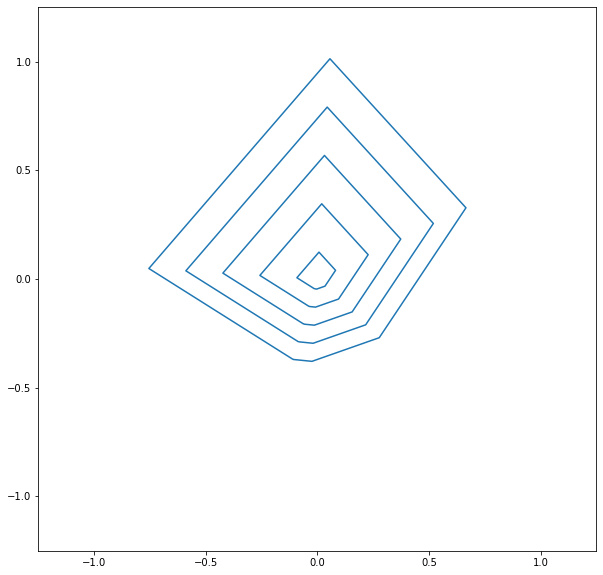

In [15]:
rescaled = []

#number of nested polygons and proportional size of smallest
n_fill_lines = 5
min_scalar = 0.1

#For each nested polygon, we figure out the factor to rescale it by and then multiply the original
#polygon by this scaler
for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center)
    rescaled.append(scaled)
    
#Plotting the nested polygons...
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(-1.25, 1.25)
ax.set_ylim(-1.25, 1.25)
lc = LineCollection(rescaled)
ax.add_collection(lc)

Now all we have to do is add that back to the original plot!

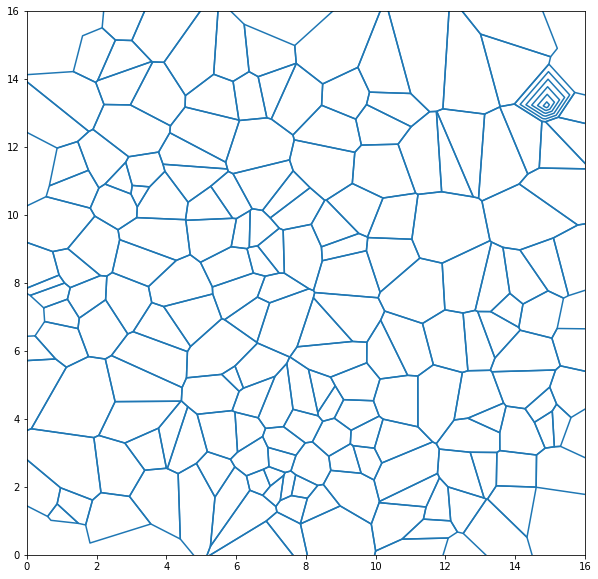

In [16]:
filled_polygon = shapes

n_fill_lines = 5
min_scalar = 0.1

for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
    scaled = scaler*(polygon - center) + center
    filled_polygon.append(scaled)
    
    
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim(0,x_max)
ax.set_ylim(0,y_max)
lc = LineCollection(filled_polygon)
ax.add_collection(lc)

Great! But we want to make nested polygons for a lot of polygons, say half of them. To do that, let's put all the code in one place and define a new `make_some_art` function to carry out all the steps we just discussed. Notice that we're also defineing a series of default parameters:

- `num_points` determines how many polygons we'll make.
- `percent_to_fill` determines how many polygons we'll fill.
- `n_fill_lines` determines how many nested polygons we'll make.
- `min_scalar` determines how small the smallest nested polygon will be.
- `multi_color_lines` determines if the lines of the polygons should be drawn with different colors.
- `line_color` determines what color the lines should be drawn with (if they are a single color).
- `bkgd_color` determines what color the background of the plot should be.
- `line_widths` determines how thick the lines will be.
- `x_max` and `y_max` determine the aspect ratio of the plot.
- `debug` plots the tick marks on the axes, in case that's helpful for debugging.

In [17]:
import random
import numpy as np
from scipy.spatial import Voronoi

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl

def make_some_art(num_points = 200, percent_to_fill = 0.5, n_fill_lines = 5, min_scalar = 0.1,
                  multi_color_lines = False, line_color = 'black', bkgd_color = 'white', line_widths = 1.5,
                  x_max = 16, y_max = 16, debug = False):
    
    x = np.random.uniform(0,x_max, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(0,y_max, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions
    
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    
    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)
    
    fill = []
    
    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    
    fig, ax = plt.subplots(figsize=(x_max-1,y_max-1))
    ax.set_aspect('equal')
    ax.set_facecolor(bkgd_color)
    
    if not debug:
        plt.xticks([])
        plt.yticks([])

    ax.set_xlim(1,x_max-1)
    ax.set_ylim(1,y_max-1)
    lc = LineCollection(shapes+fill,colors=line_color,linewidths=line_widths)
    if multi_color_lines:
        n_color_ramp = np.arange(x_max)
        lc.set_array(n_color_ramp)
    ax.add_collection(lc)
    
    return fig, ax

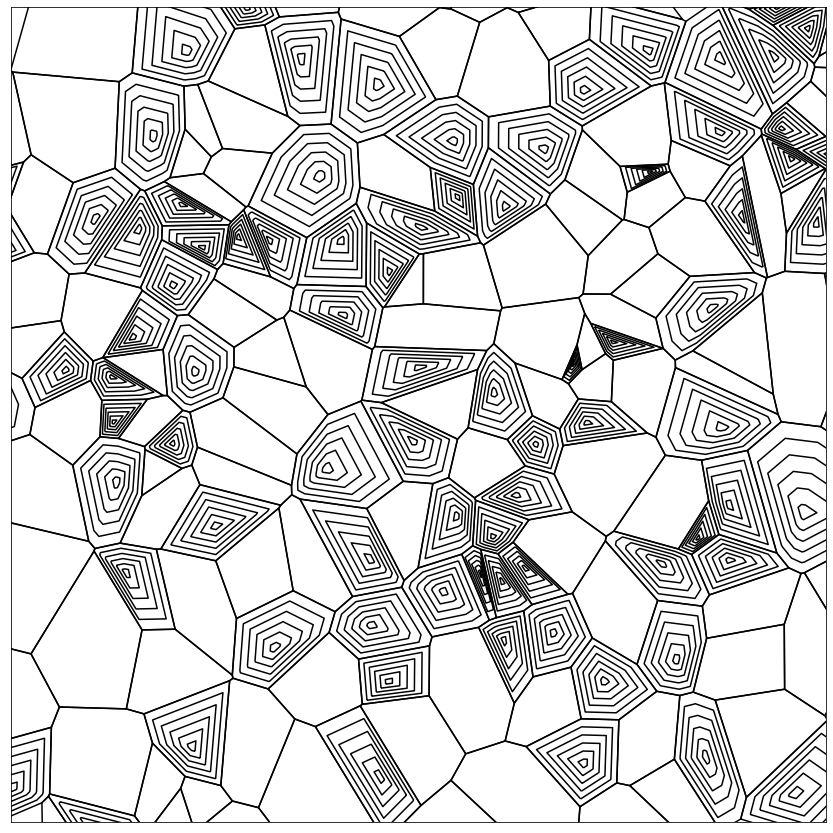

In [18]:
first_art = make_some_art()

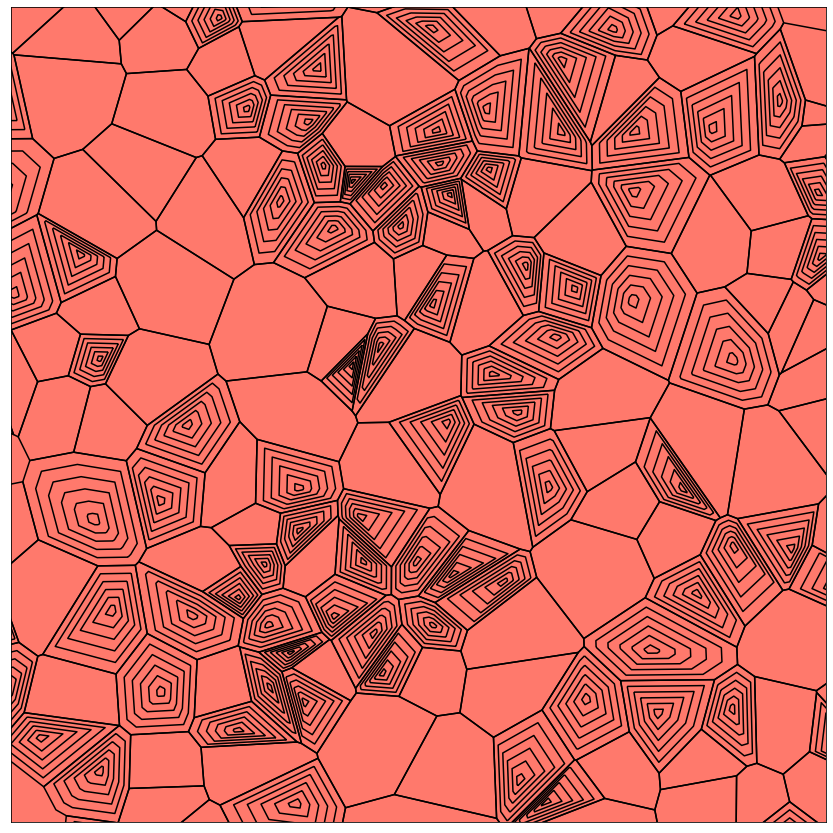

In [19]:
first_art = make_some_art(bkgd_color = 'xkcd:salmon')

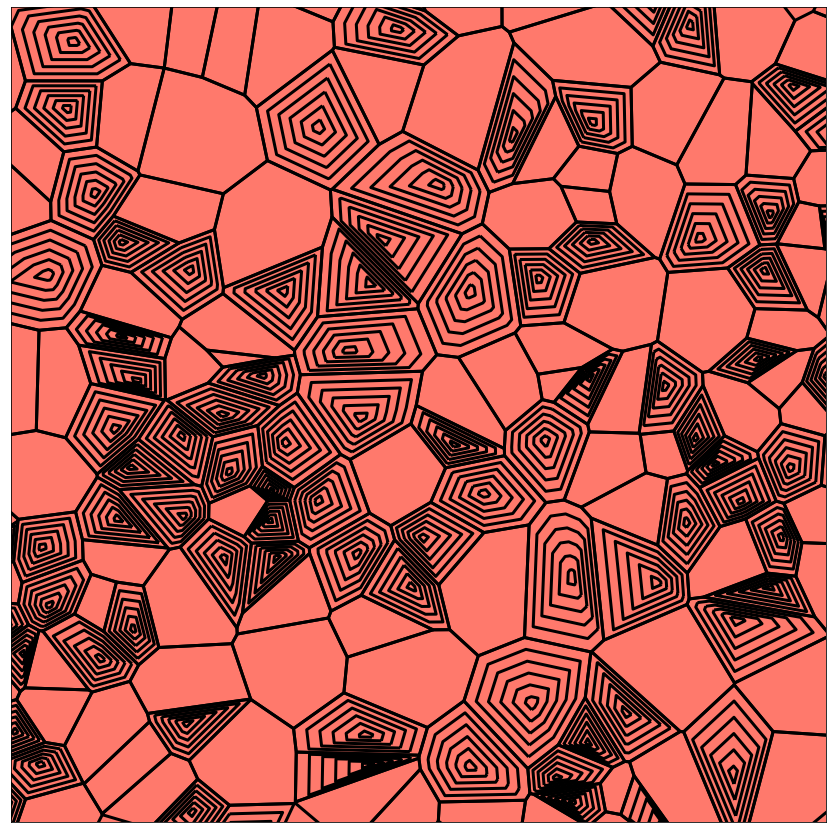

In [20]:
first_art = make_some_art(bkgd_color = 'xkcd:salmon',line_widths=3)

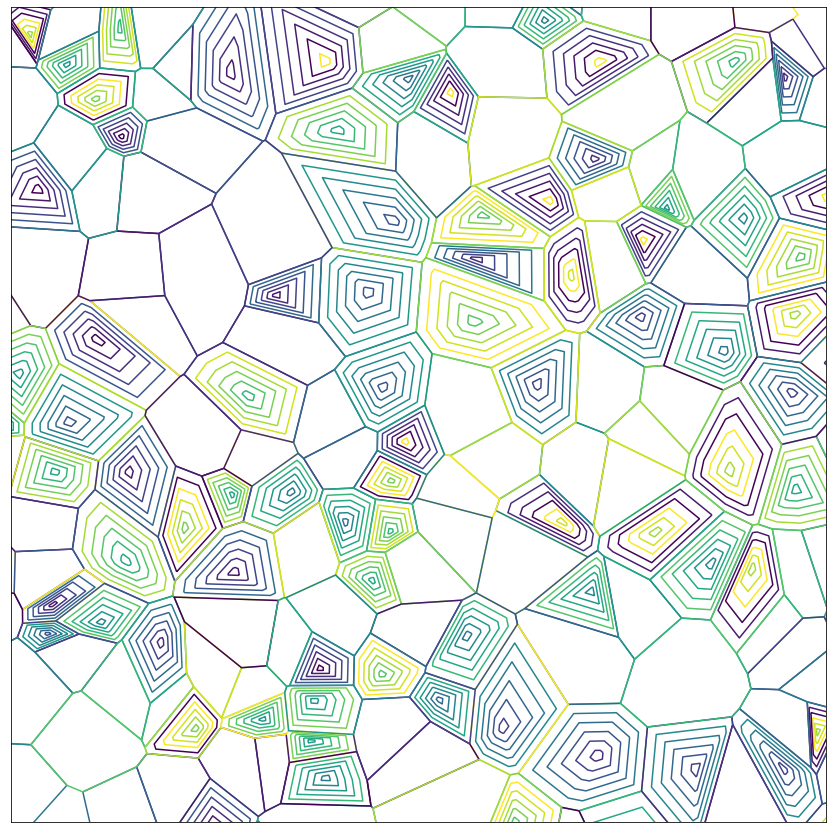

In [21]:
first_art = make_some_art(multi_color_lines = True)

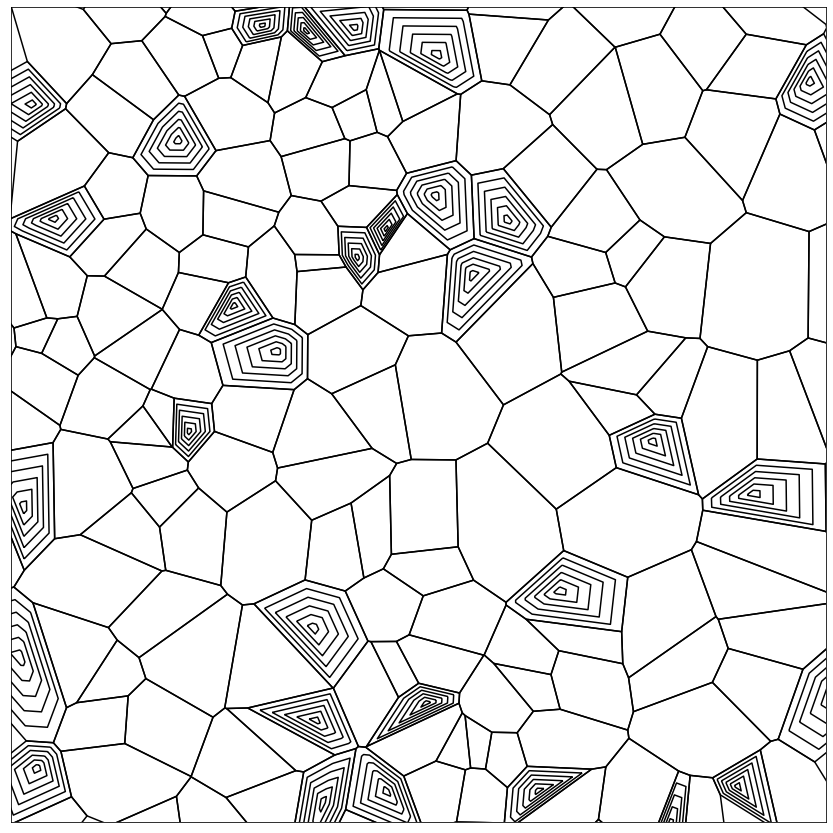

In [22]:
first_art = make_some_art(percent_to_fill = 0.2)

## Making a script

We're almost there! This works in the browser pretty well, but we want to be able to save these plots to files. Let's set it up so that we can run a script that works sort of like the `generativeart` R package. We're going to do this by making two scripts - one defines our new `make_some_art()` function as an importable module and the other allows us to run that function and easily modify arguments as necessary. First, copy and paste the code in the next `code block` into a new file in your cmm522_code directory on the cluster. You can call it `pyart.py`. Then read the directions below this `code block`.

In [23]:
import os
import random
import numpy as np
from scipy.spatial import Voronoi

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

def make_some_art(num_plots = 5, num_points = 200, percent_to_fill = 0.5, n_fill_lines = 5, min_scalar = 0.1,
                  multi_color_lines = False, line_color = 'black', bkgd_color = 'white', line_widths = 1.5,
                  x_max = 16, y_max = 16, nonrandom = None, outdir = './', debug = False):
    
    outdir = os.path.expanduser(outdir)
    outdir = os.path.join(outdir,"pyart")
    os.makedirs(outdir,exist_ok=True)
    for i in range(num_plots):
        if nonrandom is not None:
            rando = nonrandom
        else:
            rando = np.random.randint(1000,9999,1)[0]
        random.seed(rando)
        x = np.random.uniform(0,x_max, size=num_points).reshape((num_points, 1))
        y = np.random.uniform(0,y_max, size=num_points).reshape((num_points, 1))
        pts = np.hstack([x, y])
    
        vor = Voronoi(pts)
        verts = vor.vertices
        shapes_ind = vor.regions
    
        shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
        shapes = [verts[s] for s in shapes_ind]
    
        n_shapes_to_fill = int(percent_to_fill*len(shapes))
        shapes_to_fill = np.random.choice(shapes, size=n_shapes_to_fill, replace=False)
    
        fill = []
    
        for s in shapes_to_fill:
            center = np.mean(s, axis=0)
            for scaler in np.linspace(min_scalar, 1, num=n_fill_lines, endpoint=False):
                scaled = scaler*(s - center) + center
                fill.append(scaled)

    
        fig, ax = plt.subplots(figsize=(x_max-1,y_max-1))
        ax.set_aspect('equal')
        ax.set_facecolor(bkgd_color)
    
        if not debug:
            plt.xticks([])
            plt.yticks([])

        ax.set_xlim(1,x_max-1)
        ax.set_ylim(1,y_max-1)
        lc = LineCollection(shapes+fill,colors=line_color,linewidths=line_widths)
        if multi_color_lines:
            n_color_ramp = np.arange(x_max)
            lc.set_array(n_color_ramp)
        ax.add_collection(lc)
        fig.savefig(os.path.join(outdir, 'Pyart_' + str(rando) + '.pdf'))
        plt.close(fig)
        print('File ' + str(i+1) + ': ' + os.path.join(outdir, 'Pyart_' + str(rando) + '.pdf'))

Here is the second script. This is what you will run to actually create plots. Copy this code block to a new file you call `pyart_plotter.py` in your `cmm522_code` directory. You can easily modify a number of parameters within the `make_some_art()` function. For example, you can now modify where the plots are written out or where the `pyart.py` script is saved. Play around and see what you can make! Here are all the modifiable parameters again for your reference:

- `num_plots` (new!) determines how many plots we'll make. The name of the plots will include the random seed for reproducibility.
- `num_points` determines how many polygons we'll make.
- `percent_to_fill` determines how many polygons we'll fill.
- `n_fill_lines` determines how many nested polygons we'll make.
- `min_scalar` determines how small the smallest nested polygon will be.
- `multi_color_lines` determines if the lines of the polygons should be drawn with different colors.
- `line_color` determines what color the lines should be drawn with (if they are a single color).
- `bkgd_color` determines what color the background of the plot should be.
- `line_widths` determines how thick the lines will be.
- `x_max` and `y_max` determine the aspect ratio of the plot.
- `nonrandom` specifies the random seed in case you want to regenerate particular plot.
- `debug` plots the tick marks on the axes, in case that's helpful for debugging.
- `outdir` (new!) determines where the output folder (called "pyart") gets written.

In [24]:
import sys
import matplotlib as mpl
#NOTE: if you save the first script somewhere else, you need to update this next line to that location
sys.path.append("~/ccbb_projects/cmm522_code/")
import pyart

#You can change any of the default arguments in this function to make new plots
#If you want to re-draw a plot you know the seed for, set 'num_plots=1' and 'nonrandom=[whatever seed you want]'
#An example: make_some_art(num_plots=1,nonrandom=2000,bkgd_color='green',outdir = "~/ccbb_projects")
pyart.make_some_art()

File 1: ./pyart/Pyart_6881.pdf
File 2: ./pyart/Pyart_1613.pdf
File 3: ./pyart/Pyart_2371.pdf
File 4: ./pyart/Pyart_2456.pdf
File 5: ./pyart/Pyart_3211.pdf


## Runnning the script

After getting those two scripts saved to the cluster, you just need to get shell access, request an interactive session, load python3, and then run the code like this:
```sh
ocelote
interactive
module load python/3.8/3.8.2
cd ~/ccbb_projects/cmm522_code/
python3 pyart_plotter.py
```


**NOTE**: If you want to change where the plots get written out, just add an `outdir="[directory you want pyart subdirectory to end up in]"` inside the parentheses of `pyart.make_some_art()`.



## Epilogue

If you want to get really fancy, we can make it so that we can fill the polygons with color ramps or draw the lines with color ramps. The code gets a bit more complicated, but here's a script that enables semi-random labelling of polygons with different built-in matplotlib color ramps. For a list of available pallets you can check this site out:

https://matplotlib.org/stable/gallery/color/colormap_reference.html

Or you can make your own [colormap](https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html)!

In this case the modifiable arguments are:

- `num_points` determines how many polygons we'll make.
- `percent_to_fill` determines how many polygons we'll fill.
- `n_fill_lines` determines how many nested polygons we'll make.
- `min_scalar` determines how small the smallest nested polygon will be.
- `fill_colors` determins what colors fill the polygons. Can be 'none', an individual color, or a matplotlib colormap.
- `line_colors` determines what colors the lines should be drawn with. Can be an individual color, or a matplotlib colormap.
- `line_widths` determines how thick the lines will be.
- `x_max` and `y_max` determine the aspect ratio of the plot.
- `debug` plots the tick marks on the axes, in case that's helpful for debugging.

In [25]:
import random
import numpy as np
from scipy.spatial import Voronoi

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import matplotlib as mpl

def make_some_art(num_points = 200, percent_to_fill = 0.5, n_fill_lines = 5, min_scalar = 0.1, fill_colors='none',
                  line_colors = 'black', line_widths = 1.5, x_max = 16, y_max = 16, debug = False):
    
    x = np.random.uniform(0,x_max, size=num_points).reshape((num_points, 1))
    y = np.random.uniform(0,y_max, size=num_points).reshape((num_points, 1))
    pts = np.hstack([x, y])
    
    vor = Voronoi(pts)
    verts = vor.vertices
    shapes_ind = vor.regions
    
    shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
    shapes = [verts[s] for s in shapes_ind]
    
    n_shapes_to_fill = int(percent_to_fill*len(shapes))
    fill_id = np.random.choice(np.arange(len(shapes)), size=n_shapes_to_fill, replace=False).tolist()
    shapes_to_fill = [shapes[i] for i in fill_id]
    
    fill = []
    
    for s in shapes_to_fill:
        center = np.mean(s, axis=0)
        for scaler in np.linspace(1, min_scalar, num=n_fill_lines, endpoint=False):
            scaled = scaler*(s - center) + center
            fill.append(scaled)

    fig, ax = plt.subplots(figsize=(x_max-1,y_max-1))
    ax.set_aspect('equal')
    
    if not debug:
        plt.xticks([])
        plt.yticks([])

    ax.set_xlim(1,x_max-1)
    ax.set_ylim(1,y_max-1)
    try:
        multi_colors = fill_colors(range(len(shapes)))
        fill_id_expanded = [fill_id[i] for i in range(len(fill_id)) for j in range(n_fill_lines)]
        new_colors = tuple([multi_colors[i,:] for i in fill_id_expanded])
        final_colors = np.vstack((multi_colors,new_colors))
        ax.set_facecolor(final_colors[0,:])
    except TypeError:
        final_colors = fill_colors
        ax.set_facecolor(final_colors)
    try:
        multi_line_colors = line_colors(range(len(shapes)))
        fill_id_expanded = [fill_id[i] for i in range(len(fill_id)) for j in range(n_fill_lines)]
        new_colors = tuple([multi_line_colors[i,:] for i in fill_id_expanded])
        final_line_colors = np.vstack((multi_line_colors,new_colors))
    except TypeError:
        final_line_colors = line_colors
    lc = PolyCollection(shapes+fill,edgecolors=final_line_colors,linewidths=line_widths,facecolors=final_colors)
    ax.add_collection(lc)
    
    return fig, ax

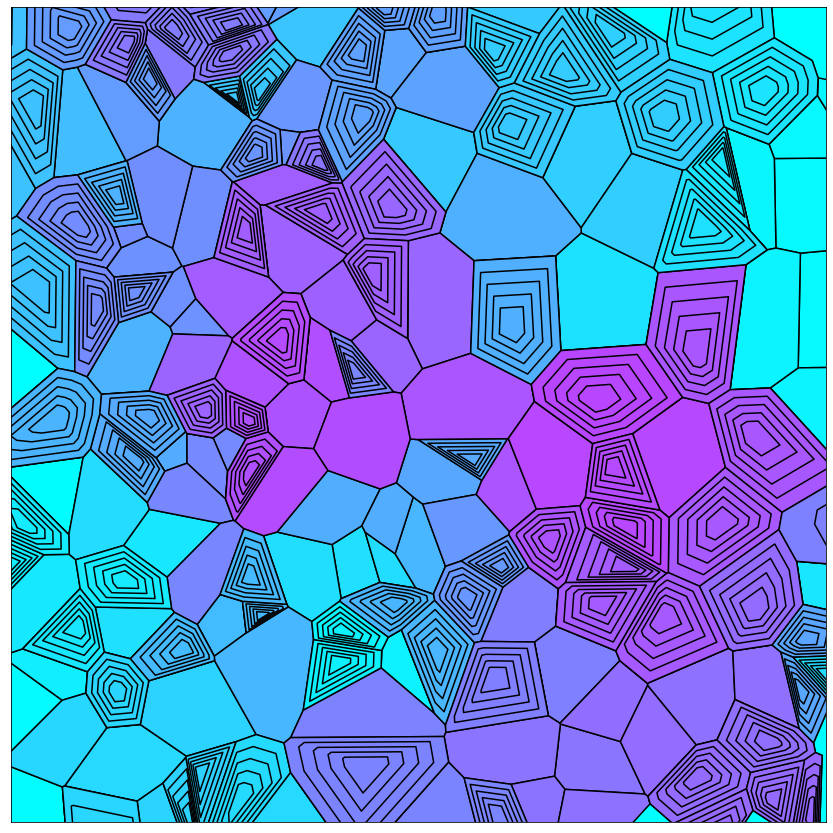

In [26]:
new_art = make_some_art(fill_colors=mpl.cm.cool)

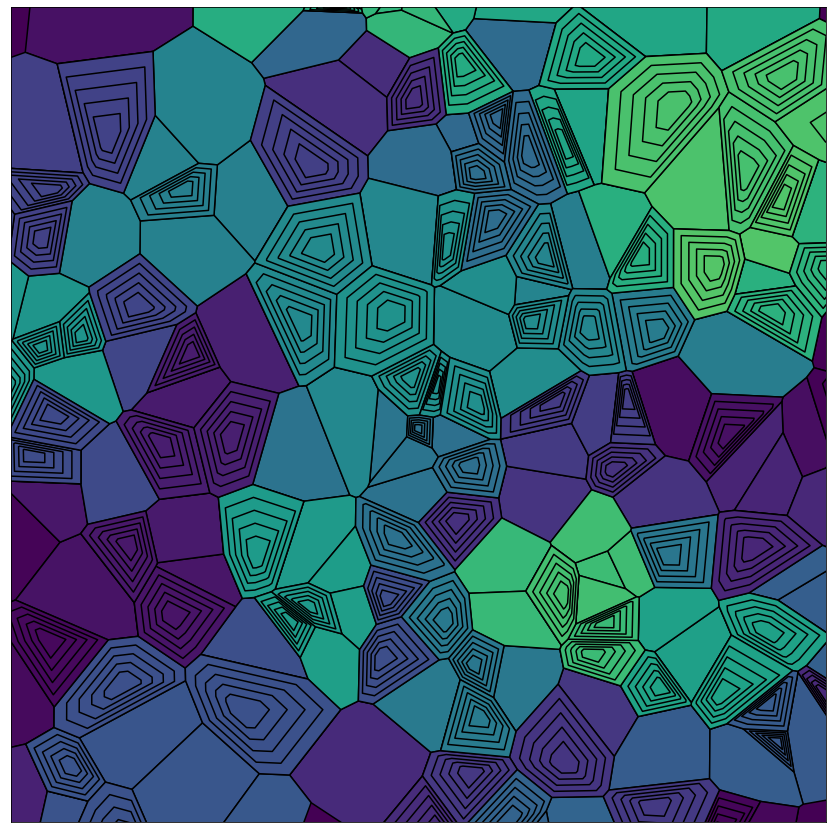

In [27]:
new_art = make_some_art(fill_colors=mpl.cm.viridis)

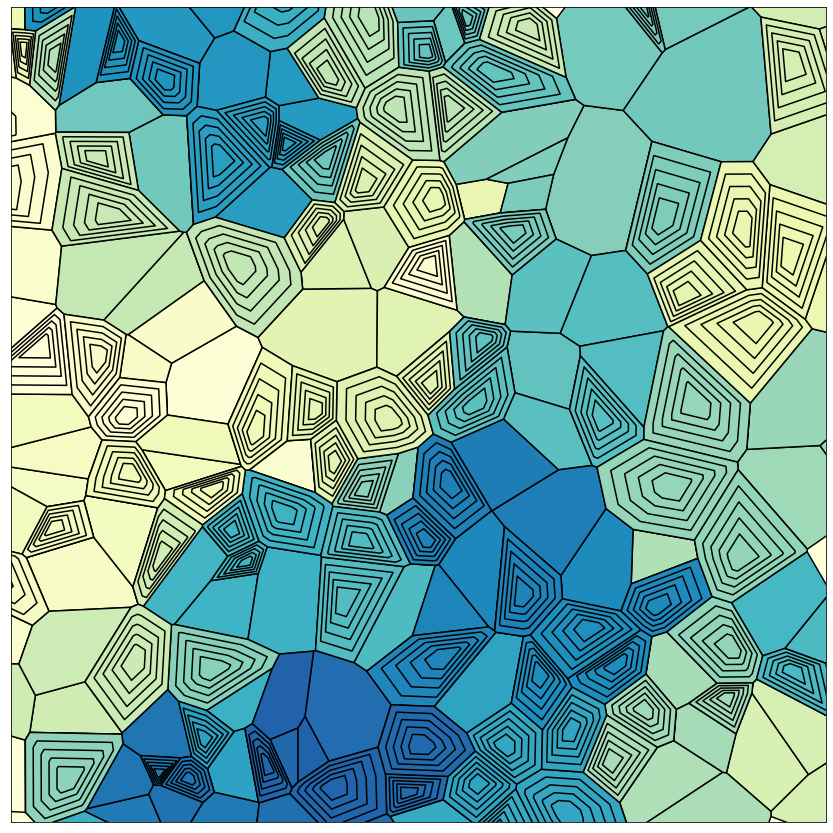

In [28]:
new_art = make_some_art(fill_colors=mpl.cm.YlGnBu)

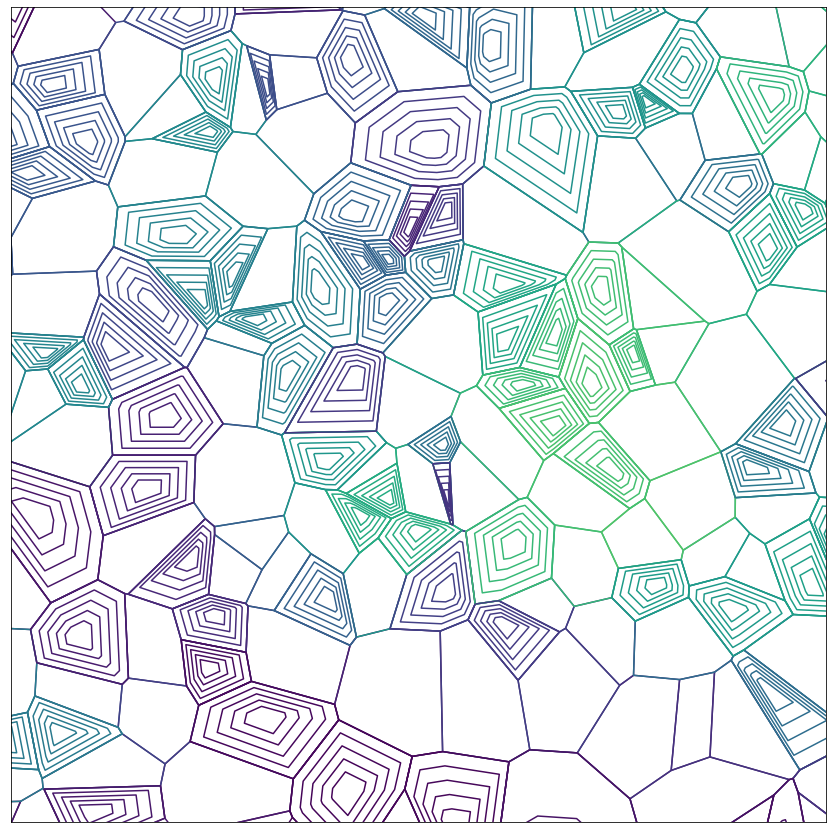

In [29]:
new_art = make_some_art(line_colors=mpl.cm.viridis)

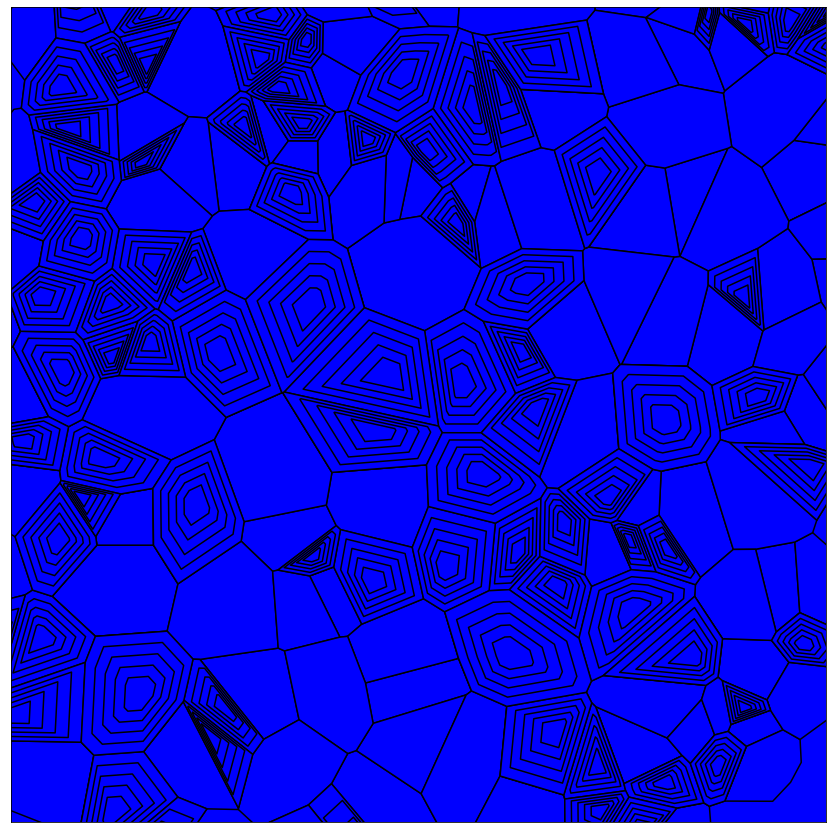

In [30]:
new_art = make_some_art(fill_colors='blue')

If you want to replace `pyart.py` with this updated script, you would copy and paste the code from the `code block` ***BELOW***. Once you've replaced the code of `pyart.py`, you can just run `pyart_plotter.py` the same as before. Here, the available arguments are:

- `num_plots` determines how many plots we'll make. The name of the plots will include the random seed for reproducibility.
- `num_points` determines how many polygons we'll make.
- `percent_to_fill` determines how many polygons we'll fill.
- `n_fill_lines` determines how many nested polygons we'll make.
- `min_scalar` determines how small the smallest nested polygon will be.
- `fill_colors` determins what colors fill the polygons. Can be 'none', an individual color, or a matplotlib colormap.
- `line_colors` determines what colors the lines should be drawn with. Can be an individual color, or a matplotlib colormap.
- `line_widths` determines how thick the lines will be.
- `x_max` and `y_max` determine the aspect ratio of the plot.
- `nonrandom` specifies the random seed in case you want to regenerate particular plot.
- `debug` plots the tick marks on the axes, in case that's helpful for debugging.
- `outdir` determines where the output folder (called "pyart") gets written.

In [31]:
import os
import random
import numpy as np
from scipy.spatial import Voronoi

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import matplotlib as mpl

def make_some_art(num_plots = 5, num_points = 200, percent_to_fill = 0.5, n_fill_lines = 5, min_scalar = 0.1,
                  fill_colors='none', line_colors = 'black', line_widths = 1.5, x_max = 16, y_max = 16,
                  nonrandom = None, debug = False, outdir = "./"):
    
    outdir = os.path.expanduser(outdir)
    outdir = os.path.join(outdir,"pyart")
    os.makedirs(outdir,exist_ok=True)
    for i in range(num_plots):
        if nonrandom is not None:
            rando = nonrandom
        else:
            rando = np.random.randint(1000,9999,1)[0]
        random.seed(rando)
        x = np.random.uniform(0,x_max, size=num_points).reshape((num_points, 1))
        y = np.random.uniform(0,y_max, size=num_points).reshape((num_points, 1))
        pts = np.hstack([x, y])
    
        vor = Voronoi(pts)
        verts = vor.vertices
        shapes_ind = vor.regions
    
        shapes_ind = [s+s[0:1] for s in shapes_ind if len(s)>0 and -1 not in s]
        shapes = [verts[s] for s in shapes_ind]
    
        n_shapes_to_fill = int(percent_to_fill*len(shapes))
        fill_id = np.random.choice(np.arange(len(shapes)), size=n_shapes_to_fill, replace=False).tolist()
        shapes_to_fill = [shapes[i] for i in fill_id]
    
        fill = []
    
        for s in shapes_to_fill:
            center = np.mean(s, axis=0)
            for scaler in np.linspace(1, min_scalar, num=n_fill_lines, endpoint=False):
                scaled = scaler*(s - center) + center
                fill.append(scaled)

        fig, ax = plt.subplots(figsize=(x_max-1,y_max-1))
        ax.set_aspect('equal')
        
        if not debug:
            plt.xticks([])
            plt.yticks([])

        ax.set_xlim(1,x_max-1)
        ax.set_ylim(1,y_max-1)
        try:
            multi_colors = fill_colors(range(len(shapes)))
            fill_id_expanded = [fill_id[i] for i in range(len(fill_id)) for j in range(n_fill_lines)]
            new_colors = tuple([multi_colors[i,:] for i in fill_id_expanded])
            final_colors = np.vstack((multi_colors,new_colors))
            ax.set_facecolor(final_colors[0,:])
        except TypeError:
            final_colors = fill_colors
            ax.set_facecolor(final_colors)
        try:
            multi_line_colors = line_colors(range(len(shapes)))
            fill_id_expanded = [fill_id[i] for i in range(len(fill_id)) for j in range(n_fill_lines)]
            new_colors = tuple([multi_line_colors[i,:] for i in fill_id_expanded])
            final_line_colors = np.vstack((multi_line_colors,new_colors))
        except TypeError:
            final_line_colors = line_colors
        lc = PolyCollection(shapes+fill,edgecolors=final_line_colors,linewidths=line_widths,facecolors=final_colors)
        ax.add_collection(lc)
        fig.savefig(os.path.join(outdir, 'Pyart_' + str(rando) + '.pdf'))
        plt.close(fig)
        print('File ' + str(i+1) + ': ' + os.path.join(outdir, 'Pyart_' + str(rando) + '.pdf'))